<a href="https://colab.research.google.com/github/Parkshinhyang/Algorithm/blob/main/Dynamic_programming(DP)_%EB%8F%99%EC%A0%81_%EA%B3%84%ED%9A%8D%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동적 계획법 

주어진 문제를 여러 개의 소문제로 분할하여 각 소문제의 해결안을 바탕으로 주어진 문제를 해결, 이때 각 소문제는 다시 또 여러 개의 소문제로 분할 가능하다. 각 소문제는 원래 주어진 문제와 동일한 문제이지만 입력의 크기가 작다. 

ex) 배낭 문제의 개념 - 배낭 문제는 무게와 가격이 다른 여러 물건 중에서, 가장 효율적으로 배낭에 채우기 위한 문제.

## 브루트 포스 검색

- 브루트 포스는 모든 경우의 수를 나열한 후 그중에서 최선의 해결책을 찾는 방법으로, 가장 좋은 결과를 확실히 추출할 수 있음.

## 탐욕 알고리즘(Greedy Algorithm)

- 가장 탐욕적으로 문제를 해결해 간다는 의미로, 가장 큰 이익의 데이터를 맨 먼저 선택하고, 그다음 이익이 큰 데이터를 취하는 방식으로 데이터를 선택함.

|보석 종류|무게|가격|
|:---:|:---:|:---:|
|금괴|6kg|13억|
|수정|4kg|8억|
|루비|3kg|6억|
|진주|5kg|12억|

## 브루트 포스 검색과 탐욕 알고리즘의 비교

- 브루트 포스 검색은 모든 경우의 수를 다 확인해 봄으로써 최선의 결과를 확실히 도출.
- 탐욕 알고리즘은 적은 연산 횟수로 결과를 얻을 수 있지만 최선의 결과를 얻지 못할 수 있음.

    - 보석 종류가 40개인 예
        - 브루트 포스 검색으로 해결하려면 40개로 발생되는 모든 경우의 수를 나열해야 함. 결국 전체 경우의 수는 2^40 = 약 1조 가지 상황이 되므로 40개를 브루트 포스 검색으로 모든 경우를 처리하는 것은 현실적으로 불가능.
        - 탐욕 알고리즘으로 처리하는 경우에는 비록 금괴 1개를 배낭에 담은 것이 수정과 루비를 넣은 것보다 좋은 결과는 아니지만 탐욕 알고리즘으로 처리하니 40회 연산만으로 결과를 도출.


## 동적 계획법의 개념과 처리 흐름

- 동적 계획법은 불필요한 연산을 줄이고, 최적의 답안을 구하는 알고리즘.
- 큰 문제를 작은 문제로 단순화한 후 재귀적인 호출을 활용하여 전체 문제를 해결.
- 동적 계획법을 실제로 구현할 때는 메모이제이션(Memoization)이라는 프로그래밍 방식을 사용함으로써 빠른 실행 결과를 얻을 수 있음.


## 동적 계획법의 이해와 구현 - 배낭 문제

도둑이 보석가게에 배낭을 메고 침입했다.배낭의 최대 용량은 W이며, 이를 초과해서 보석을 담으면 배낭이 찢어질 것이다.각 보석들의 무게와 가격은 알고 있다. 배낭이 찢어지지 않는 선에서 가격 합이 최대가 되도록 보석을 담는 방법은?

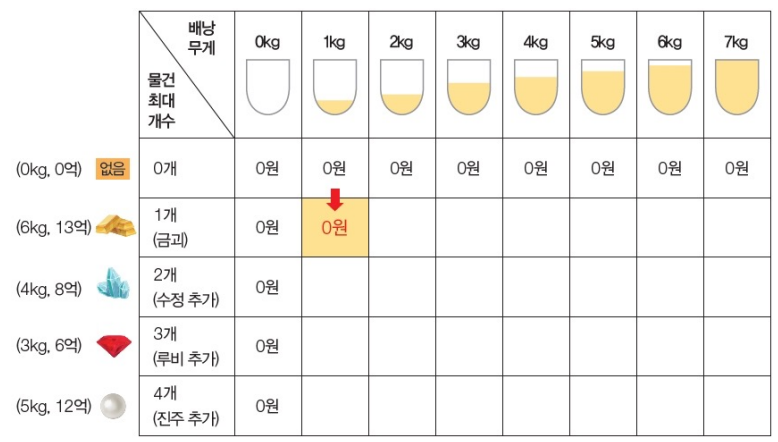

In [16]:
from pprint import pprint

def Knapsack(weight, money, max_weight, max_count):
    print('## 메모이제이션 배열 ##')
    ## 메모이제이션 배열을 0으로 초기화
    arr = [[0 for _ in range(max_weight + 1)] for _ in range(max_count + 1)]    

    ## 횟수
    for i in range(1, max_count + 1):
        ## 개수                                                       
        for j in range(1, max_weight + 1):
            ## 물건 무게가 가방의 수용 무게보다 크면                                                      
            if weight[i] > j:                                                   
                arr[i][j] = arr[i - 1][j]
            ## 물건 무게가 가방의 수용 무게보다 작거나 같으면
            else:                                                               
                val1 = money[i] + arr[i - 1][j - weight[i]]                 
                val2 = arr[i - 1][j]
                arr[i][j] = max(val1, val2)
    pprint(arr)
    print()
    return arr[max_count][max_weight]
                            
maxvalue = Knapsack([0, 6, 4, 3, 5],[0, 13, 8, 6, 12], 7, 4)

print('배낭에 담을 수 있는 보석의 최대 가격 -->', maxvalue,'억 원')

## 메모이제이션 배열 ##
[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 13, 13],
 [0, 0, 0, 0, 8, 8, 13, 13],
 [0, 0, 0, 6, 8, 8, 13, 14],
 [0, 0, 0, 6, 8, 12, 13, 14]]

배낭에 담을 수 있는 보석의 최대 가격 --> 14 억 원
